In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
from sklearn.preprocessing import StandardScaler

c:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

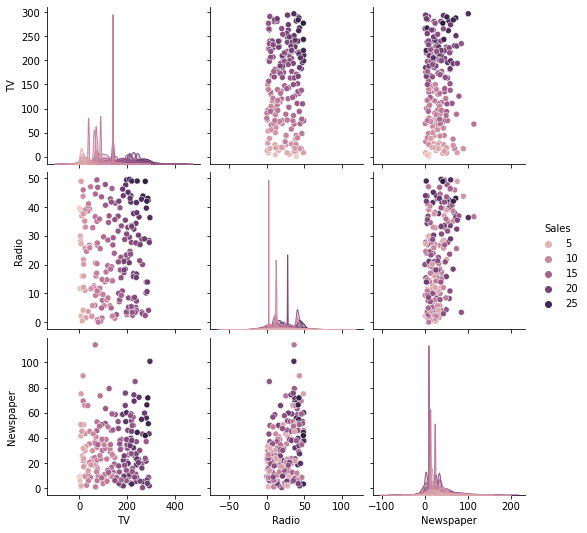

In [6]:

import seaborn as sns
sns.pairplot(df,hue='Sales')
plt.show

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

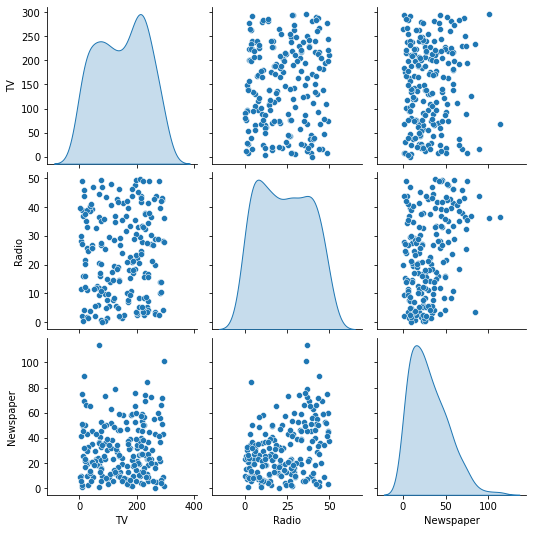

In [8]:

dl=df.iloc[:,:3]
sns.pairplot(dl,diag_kind='kde')
plt.show

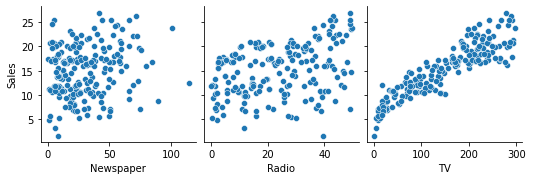

In [9]:
sns.pairplot(df, x_vars=['Newspaper','Radio','TV'], y_vars='Sales',kind='scatter')
plt.show()

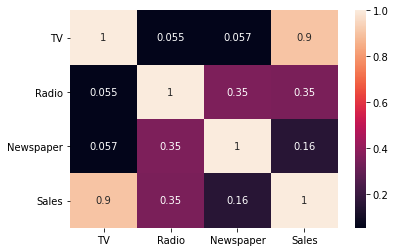

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop("Sales", axis=1)
y=df[['Sales']]


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
for i, n in enumerate(X_train.columns):
    print("the coefficient for the {} is {}".format(n,lm.coef_[0][i]))

the coefficient for the TV is 0.0548376196262162
the coefficient for the Radio is 0.10218026907174585
the coefficient for the Newspaper is 0.0007878330334789435


In [14]:
import statsmodels.api as sm


In [15]:
X_train_sm = sm.add_constant(X_train)


c:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [17]:
lr.params


const        4.633809
TV           0.054838
Radio        0.102180
Newspaper    0.000788
dtype: float64

In [18]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     442.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           4.73e-73
Time:                        05:41:24   Log-Likelihood:                -291.58
No. Observations:                 150   AIC:                             591.2
Df Residuals:                     146   BIC:                             603.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6338      0.354     13.094      0.0

In [26]:
#Model Evaluation
#Residual analysis
#To validate assumptions of the model, and hence the reliability for inference

#Distribution of the error terms
#We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
y_pred_train=lr.predict(X_train_sm)

In [27]:
res=(y_train-y_pred_train)


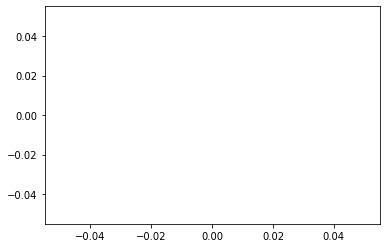

In [39]:
fig=plt.figure()
sns.distplot(res,bins=10)
plt.show()

ValueError: x and y must be the same size

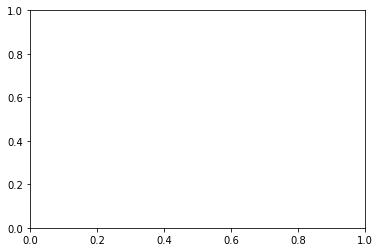

In [40]:

#Looking for patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [41]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

c:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
y_pred.head()

58     21.291421
40     18.041942
34     10.030651
102    21.048190
184    20.751671
dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
#prediction on test set
np.sqrt(mean_squared_error(y_test, y_pred))

1.5096109295725826

In [45]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9048917241361683